# Heart Disease Prediction Using Machine Learning

### Steps
1. Data gathering
2. Data preperation
3. Data Preprocessing
4. Data Transformation
5. Model Building
6. Model Evaluation

In [32]:
# Importing Libraries Which are required for our Project.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [33]:
# pip install seaborn

In [34]:
# pip install -U scikit-learn

# Data Preperation

In [35]:
df = pd.read_csv('HeartDisease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
df.tail()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [37]:
# pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Exploration

Text(0.5, 1.0, 'Histogram of Patient has heart disease')

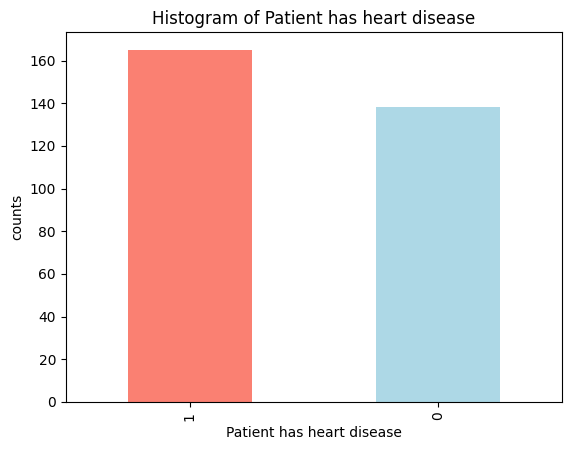

In [38]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xlabel('Patient has heart disease')
plt.ylabel('counts')
plt.title('Histogram of Patient has heart disease') 

In [39]:
# Checking whether there are any null values or not.

df.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [40]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
gender : [1 0]
chest_pain : [3 2 1 0]
rest_bps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
cholestrol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 1

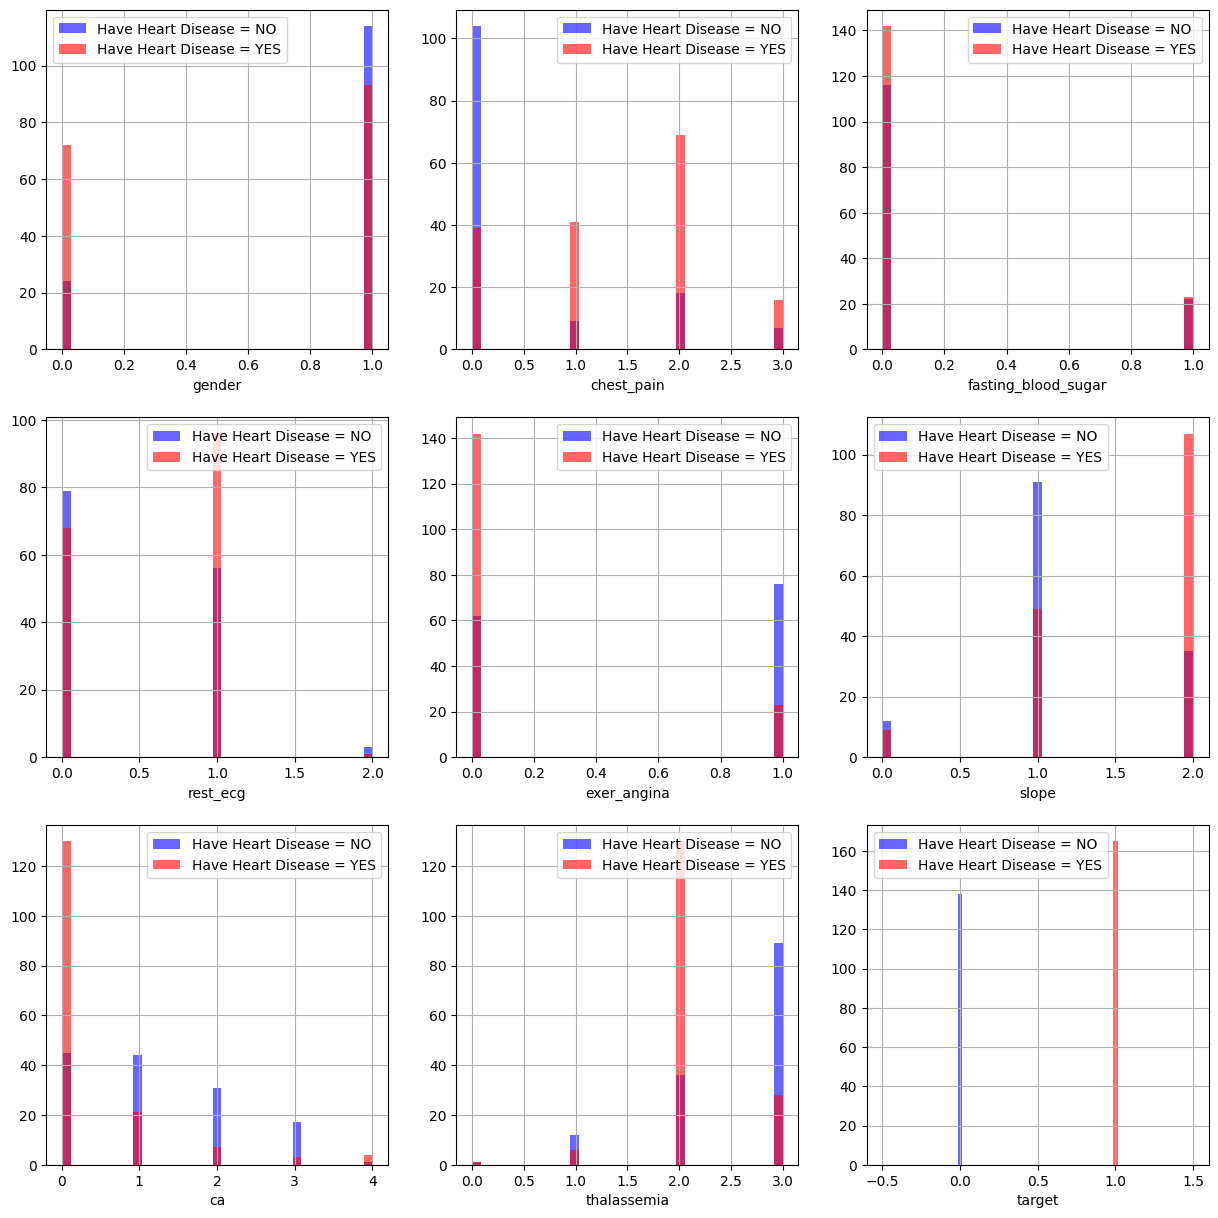

In [41]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

- cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.
- restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.
- exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)
- slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
- ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.
- thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

(14.5, -0.5)

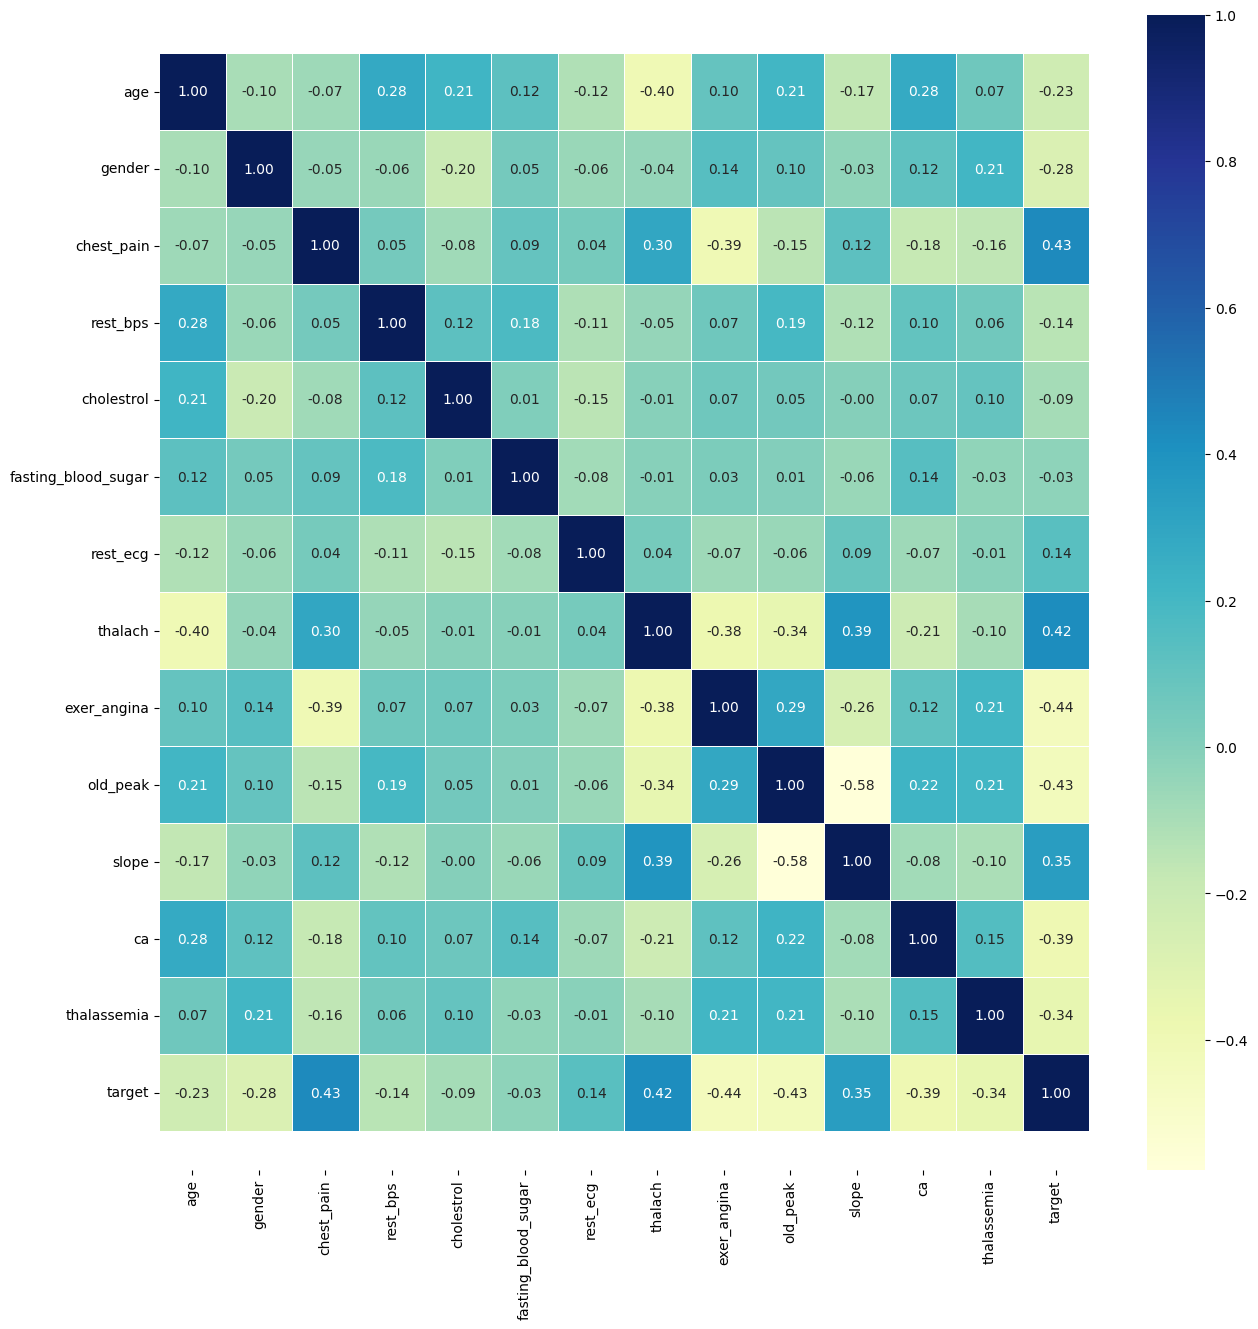

In [42]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with target'}>

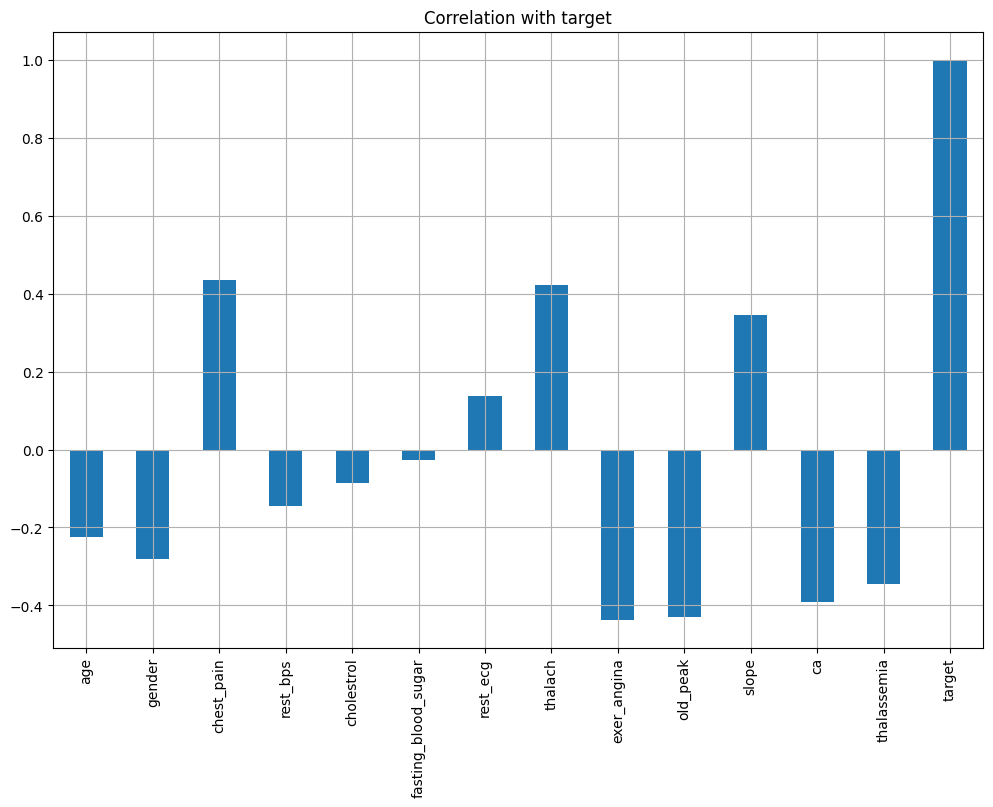

In [43]:
df.corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

Observations from correlation:

- fbs and chol are the least correlated with the target variable.
- All other variables have a significant correlation with the target variable.

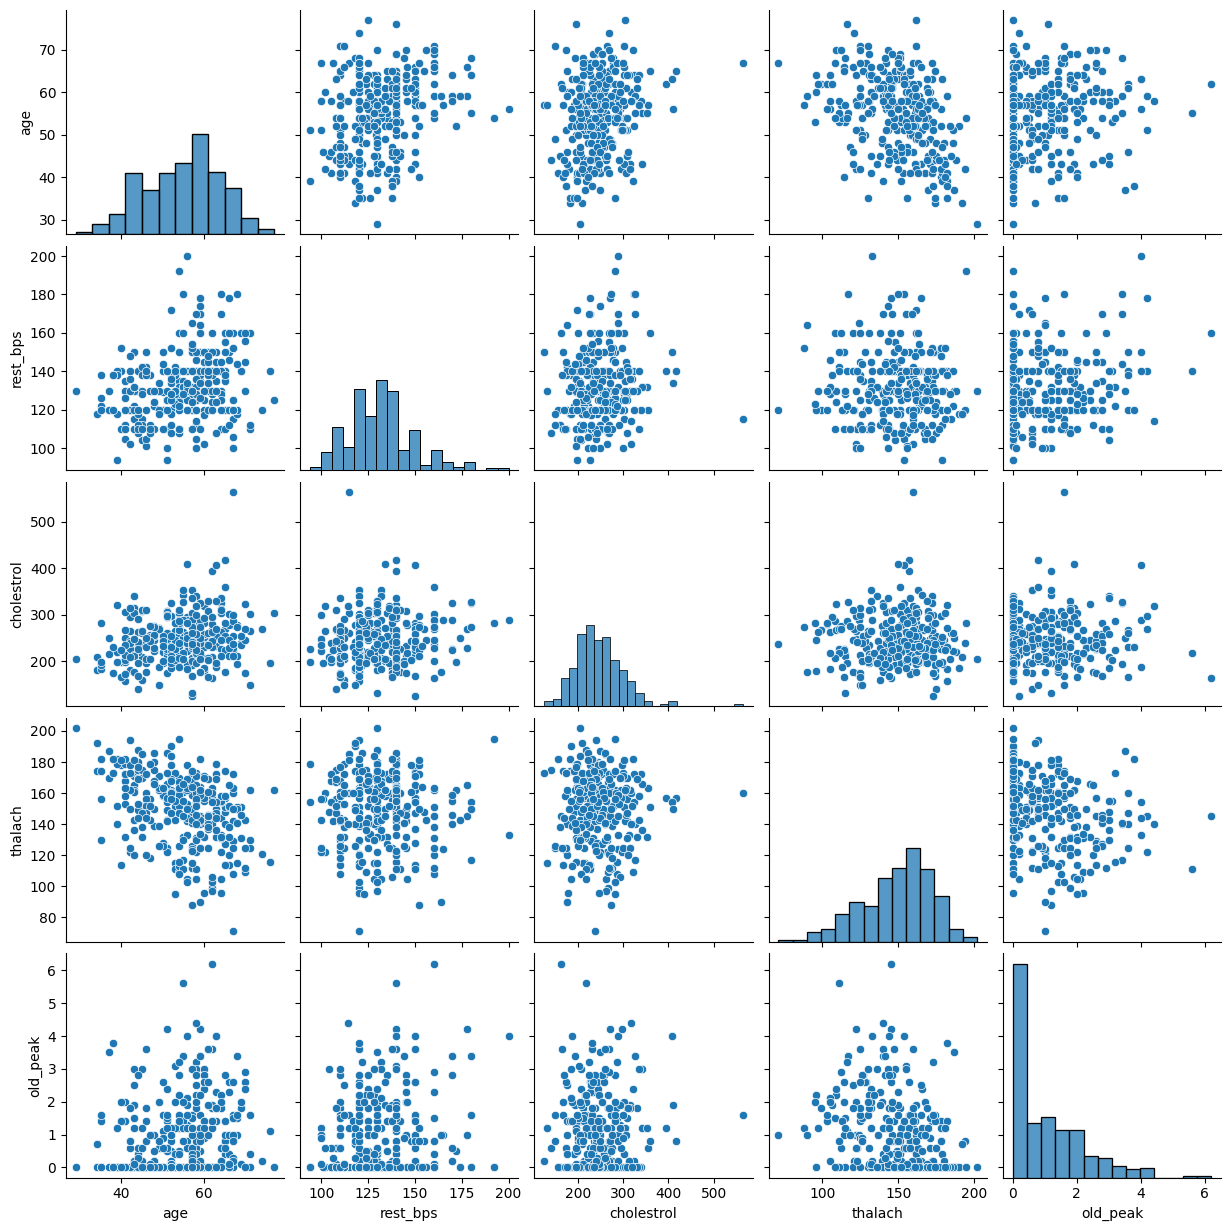

In [44]:
num_val = df[['age','rest_bps', 'cholestrol', 'thalach', 'old_peak']]
sns.pairplot(num_val)

# Data Preprocessing

In [45]:
target_var = df['target']
independent_features = df.drop(columns = ['target'])

In [46]:
df = pd.get_dummies(independent_features, columns = ['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia'])

In [47]:
df.head()

,age,rest_bps,cholestrol,thalach,old_peak,gender_0,gender_1,chest_pain_0,chest_pain_1,chest_pain_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,False,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,True,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
3,56,120,236,178,0.8,False,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
4,57,120,354,163,0.6,True,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


# Data Transformation

In [48]:
sc = StandardScaler()
col_to_scale = ['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']
df[col_to_scale] = sc.fit_transform(df[col_to_scale])

In [49]:
df.head()

,age,rest_bps,cholestrol,thalach,old_peak,gender_0,gender_1,chest_pain_0,chest_pain_1,chest_pain_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,False,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,True,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,False,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,True,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


In [50]:
#df.describe()

# Model Training and train Test Split

In [51]:
X = df
y = target_var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Logistic Regression

In [53]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.60%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.883495    0.870504  0.876033    0.876999      0.876355
recall       0.834862    0.909774  0.876033    0.872318      0.876033
f1-score     0.858491    0.889706  0.876033    0.874098      0.875646
support    109.000000  133.000000  0.876033  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 91  18]
 [ 12 121]]

Test Result:
Accuracy Score: 88.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.866667   0.903226  0.885246   0.884946      0.885845
recall      0.896552   0.875000  0.885246   0.885776      0.885246
f1-score    0.881356   0.888889  0.885246   0.885122      0.885308
support    29.000000  32.000000  0.885246  61.000000     61.000000
________

# Support Vector Machine

In [54]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

print_score(svc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.15%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.924528    0.919118  0.921488    0.921823      0.921555
recall       0.899083    0.939850  0.921488    0.919466      0.921488
f1-score     0.911628    0.929368  0.921488    0.920498      0.921378
support    109.000000  133.000000  0.921488  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 98  11]
 [  8 125]]

Test Result:
Accuracy Score: 90.16%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.870968   0.933333  0.901639   0.902151      0.903684
recall      0.931034   0.875000  0.901639   0.903017      0.901639
f1-score    0.900000   0.903226  0.901639   0.901613      0.901692
support    29.000000  32.000000  0.901639  61.000000     61.000000
________

# Naive Bayes

In [55]:
GaussianNB_clf = GaussianNB()
GaussianNB_clf.fit(X_train, y_train)

print_score(GaussianNB_clf, X_train, y_train, X_test, y_test, train=True)
print_score(GaussianNB_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 54.96%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.500000    1.000000  0.549587    0.750000      0.774793
recall       1.000000    0.180451  0.549587    0.590226      0.549587
f1-score     0.666667    0.305732  0.549587    0.486200      0.468302
support    109.000000  133.000000  0.549587  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [109  24]]

Test Result:
Accuracy Score: 49.18%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.482143   0.600000  0.491803   0.541071      0.543970
recall      0.931034   0.093750  0.491803   0.512392      0.491803
f1-score    0.635294   0.162162  0.491803   0.398728      0.387094
support    29.000000  32.000000  0.491803  61.000000     61.000000
________

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0       1  accuracy  macro avg  weighted avg
precision   0.862069   0.875  0.868852   0.868534      0.868852
recall      0.862069   0.875  0.868852   0.868534      0.868852
f1-score    0.862069   0.875  0.868852   0.868534      0.868852
support    29.000000  32.000  0.868852  61.000000     61.000000
_______________________________________________
Confusion Matrix: 
 [[25  4]


# Decision Tree

In [56]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 80.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.757576   0.857143  0.803279   0.807359      0.809808
recall      0.862069   0.750000  0.803279   0.806034      0.803279
f1-score    0.806452   0.800000  0.803279   0.803226      0.803067
support    29.000000  32.000000  0.803279  61.000000     61.000000
_______________________________________________
Confusion Matr

In [57]:
# aa=( 0.29046364,  0.47839125, -0.10172985, -1.16528085, -0.7243226 ,
#          1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
#          0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
#          0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
#          0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
#          0.        ,  0.        ,  0.        ,  0.        ,  1. )

# ab=(0.95, 0.76, -0.26, 0.02,    1.09,   0.00,   1.00,    0.00,   
#     0.00,    0.00,   1.00,  0.00,  1.00,   1.00,   0.00,  0.00,  
#     1.00,  0.00, 1.00,  0.00,  0.00,  1.00,  0.00,  0.00,  0.00,
#     0.00,  0.00,   1.00,  0.00, 0.00)
# a = np.asarray(aa)
# # a = a.reshape(1,-1)
# p = svc_clf.predict(a)


In [62]:
X_train.iloc[20]

age                      0.180175
rest_bps                 0.021488
cholestrol              -1.203282
thalach                  -1.95243
old_peak                 0.914799
gender_0                    False
gender_1                     True
chest_pain_0                 True
chest_pain_1                False
chest_pain_2                False
chest_pain_3                False
fasting_blood_sugar_0        True
fasting_blood_sugar_1       False
rest_ecg_0                   True
rest_ecg_1                  False
rest_ecg_2                  False
exer_angina_0               False
exer_angina_1                True
slope_0                     False
slope_1                      True
slope_2                     False
ca_0                        False
ca_1                         True
ca_2                        False
ca_3                        False
ca_4                        False
thalassemia_0               False
thalassemia_1                True
thalassemia_2               False
thalassemia_3 

In [63]:
new = X_train.iloc[150]
a = np.asarray(new)
a = a.reshape(1,-1)
p = svc_clf.predict(a)

In [64]:
p[0]

0

In [65]:
if (p[0] == 1):
    print("Person has heart disease")
else:
    print("Great! the results are normal")

Great! the results are normal


### Conclusion

So, In this project, We have used Machine Learning to predict whether a person is suffering from a heart disease or not. 
Steps which were involved along the project.
1. Data Collection.
2. Data Preperation(Importing, Exploratory Data Analysis), After importing the data we have used some basic pandas fucntions to get to know more about the data, such as, Head(), tail(), Descibe() -> for statistical analysis, info(), 
3. Data Exploration, we have used some plots to get an understanding of what our data is telling to us, like count of our target variable, Histogram to check whetehr the variables are normally distributed or not, Unique values present in a variable.
4. Data preprocessing, here we have checked whether their are any null vlaues, outliers or unwanted values, fortunaltely we didnt have any, so after that we have created dummy variables using pd.get_dummies(), to transform our categorical variables to numerical(0/1).
5. Data Transformation: this will help us to trasform the variables/ used to bring all the variables to the same scale, using StandardScaler()/Normalisation().
6. Data Modelling: Before modelling our data, we are splitting our data to trian_test_split(80/20), After which we have used 2 Machine Learning algorithms, `Logistic Regression` and  `Support Vector Classifier`. I varied parameters across each model to improve their scores.
In the end, we can see that  `Support Vector Classifier`  has achieved better scores compared to other model.